# Sprint4_ロジスティック回帰

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

data = load_iris()
X = np.array(data.data)
y = np.array(data.target).reshape(150,1)

temp = np.concatenate((X,y),axis=1)
temp = temp[temp[:,4] > 0] #virgicolorとvirginica抽出
temp[:,4] = np.where(temp[:,4] < 2, 0, 1) #virgicolorを0, virginicaを1へ置換

X = temp[:,:4]
y = temp[:,-1].reshape(100,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)


    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """

        self.n_samples, self.n_features = X.shape
        self.theta = np.zeros((self.n_features,1))
        
        #メイン処理
        for i in range(self.iter):

            hypothesis = np.dot(X, self.theta) + self.bias

            if X_val is not None and y_val is not None:
              hypothesis_val = np.dot(X_val, self.theta) + self.bias

            #問題1（仮定関数の計算）
            Y_pred = self._sigmoid(hypothesis)
            
            if X_val is not None and y_val is not None:
              Y_val_pred = self._sigmoid(hypothesis_val)


            #問題2（勾配降下法の計算）
            self._gradient_descent(X, y, Y_pred)

            #問題4（目的関数の計算）
            self._loss(y, Y_pred, i, y_val=y_val, Y_val_pred=Y_val_pred)

            # if X_val is not None and y_val is not None:


        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        return



    # 問題1（仮定関数の計算）
    def _sigmoid(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        theta：　
        　　　　パラメータベクトル（傾き）

        Returns
        -------
        Y_pred：　次の形のndarray, shape (n_samples, n_features)
          仮定関数による推定結果
        """

        Y_pred = 1 / ( 1 + np.exp( - X ) )

        return Y_pred

    # 問題2（勾配降下法の計算）
    def _gradient_descent(self, X, y, Y_pred):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        Y_pred：
        　　　　　　　予測値

        Returns
        -------

        """
        dw = ( 1 / self.n_samples) * np.dot(X.T, ( Y_pred - y ) )
        db = ( 1 / self.n_samples) * np.sum( Y_pred - y )

        self.theta -= self.lr * dw
        self.bias -= self.lr * db

        return
    
    #問題3（推定）
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        Returns
        -------
        Y_pred_cls
            ロジスティック回帰による推定結果
        """
        hypothesis = np.dot(X, self.theta) + self.bias
        Y_pred = self._sigmoid(hypothesis)
        Y_pred_cls = [1 if i > 0.5 else 0 for i in Y_pred]
        
        return Y_pred_cls
    
    #問題3（推定）
    def predict_probs(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        return self._sigmoid(np.dot(X, self.theta))
    
    #問題4（目的関数）
    def _loss(self, y, Y_pred, i, y_val=None, Y_val_pred=None):
      　　　"""
        目的関数。thetaの調整具合を記録する
        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        Y_pred：
  　　　　　　　　　　　　　　　　　y（訓練データ）の予測値
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        y_val_pred：
        　　　　　　y_val（検証データ）の予測値
      　　　i:
            イテレーション回数

        Returns
        -------
        
        """
        j = (-y * np.log1p(Y_pred) - ( 1 - y ) * np.log1p( 1 - Y_pred ) ).mean()
        self.loss[i] = j

        if y_val is not None:
          j_val = (-y_val * np.log1p(Y_val_pred) - ( 1 - y_val ) * np.log1p( 1 - Y_val_pred ) ).mean()
          self.val_loss[i] = j_val
        
        return

num_iter = 1000
lr = 0.1
bias = 0
verbose=0

a = ScratchLogisticRegression(num_iter=num_iter, lr=lr, bias=bias, verbose=verbose)
a.fit(X_train,y_train, X_test, y_test)
Y_pred_probs = a.predict_probs(X_test)
print('Predicted probs')
print(Y_pred_probs)
Y_pred = a.predict(X_test)
print()
print(f'Y_pred: {Y_pred}')
print(f'y_test: {y_test.reshape(-1,)}')

Predicted probs
[[0.29876878]
 [0.99481103]
 [0.91236624]
 [0.73997259]
 [0.06873466]
 [0.13684986]
 [0.03271322]
 [0.98644618]
 [0.11839171]
 [0.20563352]
 [0.28853049]
 [0.97756369]
 [0.9722403 ]
 [0.38212385]
 [0.99758911]
 [0.99443659]
 [0.87632388]
 [0.8781428 ]
 [0.26890154]
 [0.98718932]]

Y_pred: [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]
y_test: [0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


In [27]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(f'accuracy_score : {accuracy_score(y_test, Y_pred):.2%}')#正解率（正解の割合）
print(f'precision_score : {precision_score(y_test, Y_pred):.2%}')#適合率（陽性と予測されたサンプルのうち正解したサンプルの割合）
print(f'recall_score : {recall_score(y_test, Y_pred):.2%}.')#再現率（実際に陽性のサンプルのうち正解したサンプルの割合）
print(f'f1_score : {f1_score(y_test, Y_pred):.2%}')#F値（適合率と再現率の調和平均）
print('confusion_matrix :')#混同行列
print(confusion_matrix(y_test, Y_pred))

accuracy_score : 95.00%
precision_score : 90.00%
recall_score : 100.00%.
f1_score : 94.74%
confusion_matrix :
[[10  1]
 [ 0  9]]


# 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。

In [ ]:
#上方クラスへ実装済み
def _sigmoid(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    theta：　
    　　　　パラメータベクトル（傾き）

    Returns
    -------
    Y_pred：　次の形のndarray, shape (n_samples, n_features)
      仮定関数による推定結果
    """

    Y_pred = 1 / ( 1 + np.exp( - X ) )

    return Y_pred

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

In [ ]:
#上方クラスへ実装済み
def _gradient_descent(self, X, y, Y_pred):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    theta：　
    　　　　パラメータベクトル（傾き）

    Returns
    -------
    Y_pred：　次の形のndarray, shape (n_samples, n_features)
      仮定関数による推定結果
    """
    dw = ( 1 / self.n_samples) * np.dot(X.T, ( Y_pred - y ) )
    db = ( 1 / self.n_samples) * np.sum( Y_pred - y )

    self.theta -= self.lr * dw
    self.bias -= self.lr * db

    return

# 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。

In [ ]:
#上方クラスへ実装済み
def predict(self, X):
    """
    ロジスティック回帰を使いラベルを推定する。
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    Returns
    -------
    Y_pred_cls
        ロジスティック回帰による推定結果
    """
    hypothesis = np.dot(X, self.theta) + self.bias
    Y_pred = self._sigmoid(hypothesis)
    Y_pred_cls = [1 if i > 0.5 else 0 for i in Y_pred]
    
    return Y_pred_cls

#問題3（推定）
def predict_probs(self, X):
    """
    ロジスティック回帰を使い確率を推定する。
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        ロジスティック回帰による推定結果
    """

    return self._sigmoid(np.dot(X, self.theta))

# 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

In [ ]:
#上方クラスへ実装済み
def _loss(self, y, Y_pred, i, y_val=None, Y_val_pred=None):
  　　　"""
    目的関数。thetaの調整具合を記録する
    Parameters
    ----------
    y : 次の形のndarray, shape (n_samples, )
        訓練データの正解値
    Y_pred：
　　　　　　　　　　　　　　　　　y（訓練データ）の予測値
    y_val : 次の形のndarray, shape (n_samples, )
        検証データの正解値
    y_val_pred：
    　　　　　　y_val（検証データ）の予測値
  　　　i:
        イテレーション回数

    Returns
    -------
    
    """
    j = (-y * np.log1p(Y_pred) - ( 1 - y ) * np.log1p( 1 - Y_pred ) ).mean()
    self.loss[i] = j

    if y_val is not None:
      j_val = (-y_val * np.log1p(Y_val_pred) - ( 1 - y_val ) * np.log1p( 1 - Y_val_pred ) ).mean()
      self.val_loss[i] = j_val
    
    return

# 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。

In [ ]:
#上方へ実装済み

# 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

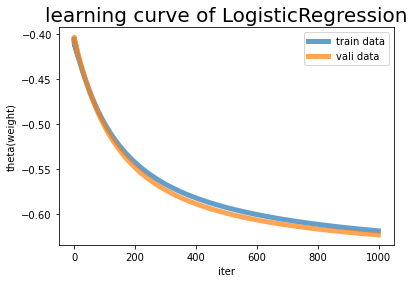

In [22]:
import matplotlib.pyplot as plt

plt.title('learning curve of LogisticRegression', fontsize=20, fontweight=20)
plt.xlabel('iter')
plt.ylabel('theta(weight)')
plt.plot(a.loss, linewidth=5, alpha=0.7, label='train data')
plt.plot(a.val_loss, linewidth=5, alpha=0.7, label='vali data')
plt.legend()
plt.show()

# 【問題7】決定領域の可視化
決定領域を可視化してください。

In [86]:
#決定領域描写のため、説明変数を2変数に絞り込み
from sklearn.linear_model import LogisticRegression

X = np.array(data.data)
y = np.array(data.target).reshape(150,1)

temp = np.concatenate((X,y),axis=1)
temp = temp[temp[:,4] > 0] #virgicolorとvirginica抽出
temp[:,4] = np.where(temp[:,4] < 2, 0, 1) #virgicolorを0, virginicaを1へ置換

X = temp[:, [0, 2]]
y = temp[:,-1].reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

num_iter = 1000
lr = 0.1
bias = 0
verbose=0

b = ScratchLogisticRegression(num_iter=num_iter, lr=lr, bias=bias, verbose=verbose)
b.fit(X_train,y_train, X_test, y_test)

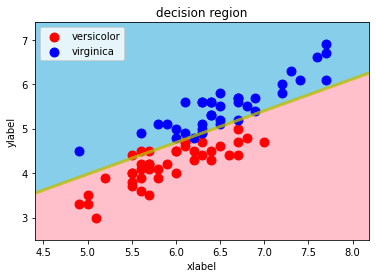

In [111]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = np.array(model.predict(mesh)).reshape(mesh_f0.shape)
    y = y.reshape(-1,)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:,0], X[y==target][:,1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_train, y_train, b)